# CLIENT PROJECT

## Business case for  PRCL-0019

## Problem Statement

FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions.
FicZon major leads generation channel is digital and through their website.  FicZon business is majorly dependent on the sales force effectiveness.
As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.  
Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff.
Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness. 
 
PROJECT GOAL: 1. Data exploration insights – Sales effectiveness.
              2. ML model to predict the Lead Category (High Potential , Low Potential)

## Step 1: Understand the Problem


In [ ]:
FicZon faces declining sales due to challenges in lead categorization.
Current lead categorization is manual and post-analysis-based, leading to inefficiencies.
Objective: Use ML to automate and pre-categorize leads, improving the quality of sales efforts.


## Step 2: Define the Project Goals

In [ ]:
Data Exploration Insights: Understand data patterns and identify factors affecting sales effectiveness.
ML Model Development: Build a predictive model to categorize leads into "High Potential" or "Low Potential."

In [ ]:
PROJECT GOAL: 1. Data exploration insights – Sales effectiveness.
              2. ML model to predict the Lead Category (High Potential , Low Potential)

# Overview of the dataset

In [ ]:
The dataset consists of 7422 rows × 9 columns.

#COLUMNS:
      Created:  Likely a timestamp of when the record was created.
   Product_ID:  Product identifier (categorical or numerical, may need handling of missing values).
       Source:  The source of interaction (e.g., Website, Call, CRM form).
       Mobile:  Customer mobile (may not be useful as is).
        EMAIL:  Customer email (potentially anonymized; unlikely to be useful directly).
  Sales_Agent:  Identifier for the sales agent.
     Location:  Location of the transaction or customer.
Delivery_Mode:  Mode of delivery for the product.
       Status:  Outcome/status of the record (e.g., Open, Converted, Lost).

#Potential Issues:
Missing values (NaN, VALUE!) in columns like Product_ID, Location, and Mobile.
Text data in columns like Source, Sales_Agent, Location, and Status.

## import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler


## import the dataset

In [2]:
data = pd.read_csv("PRCL-0019.csv", delimiter=';', encoding='latin1')

In [3]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


## Basic  checks

In [4]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [5]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [6]:
data.shape

(7422, 9)

In [7]:
data.size

66798

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


## Checking the null values in the dataset

In [9]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [10]:
data.dropna()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9.0,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential
19,13-11-2018 18:48,19.0,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential
24,13-11-2018 17:09,18.0,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,13-11-2018 16:49,15.0,Website,970XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,13-11-2018 16:37,18.0,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...,...,...,...
5607,11-06-2018 15:20,9.0,Live Chat-Direct,830XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-5,Hyderabad,Mode-5,LOST
5608,11-06-2018 15:15,9.0,Live Chat-Direct,991XXXXXXX,vXXXXXXX@gmail.com,Sales-Agent-5,Delhi,Mode-3,CONVERTED
5609,11-06-2018 14:54,27.0,Call,988XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-4,Chennai,Mode-3,Junk Lead
5610,11-06-2018 14:40,19.0,Live Chat-Google Organic,955XXXXXXX,sXXXXXXX@gmail.com,Sales-Agent-11,Hyderabad,Mode-3,CONVERTED


In [11]:
data.isnull().sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [12]:
# Null columns

In [13]:
null_columns=data.columns[data.isnull().any()]
print(null_columns)

Index(['Product_ID', 'Source', 'Mobile', 'Sales_Agent', 'Location'], dtype='object')


In [14]:
data[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product_ID   7364 non-null   float64
 1   Source       7405 non-null   object 
 2   Mobile       5612 non-null   object 
 3   Sales_Agent  7399 non-null   object 
 4   Location     7364 non-null   object 
dtypes: float64(1), object(4)
memory usage: 290.1+ KB


##  Columns above 50 % null values then drop that columns

In [15]:
null_percentage = data.isnull().mean() * 100

# Filter columns where null percentage is greater than 50%
columns_above_50 = null_percentage[null_percentage > 50]

# Print the result
print(columns_above_50)

Series([], dtype: float64)


## Handling the null values

In [16]:
# Product_ID

In [17]:
data.Product_ID.value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

<Axes: >

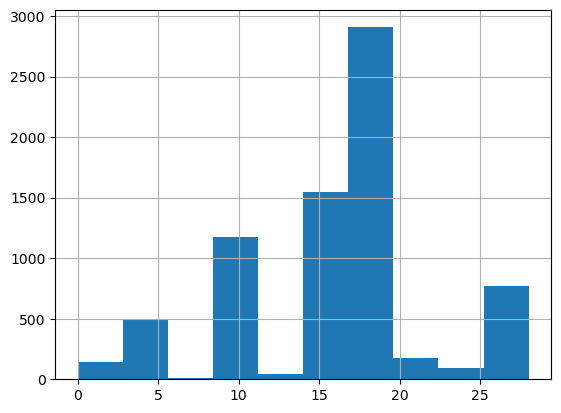

In [18]:
data.Product_ID.hist()

In [19]:
data.loc[data['Product_ID'].isnull(),'Product_ID']="median"

In [20]:
data.isnull().sum()

Created             0
Product_ID          0
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [21]:
## Source

<Axes: >

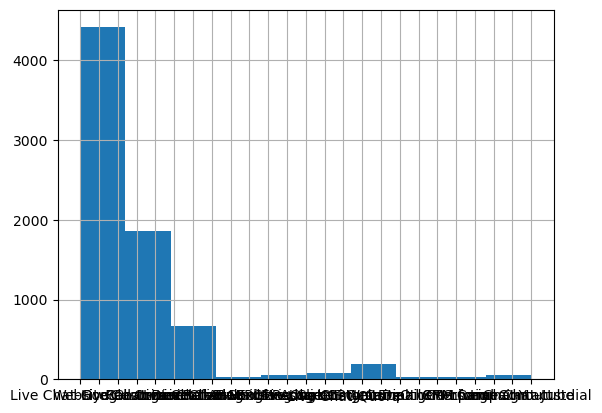

In [22]:
data.Source.hist()

In [23]:
data.loc[data['Source'].isnull(),'Source']="median"

In [24]:
data.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

In [25]:
## Mobile 

<Axes: >

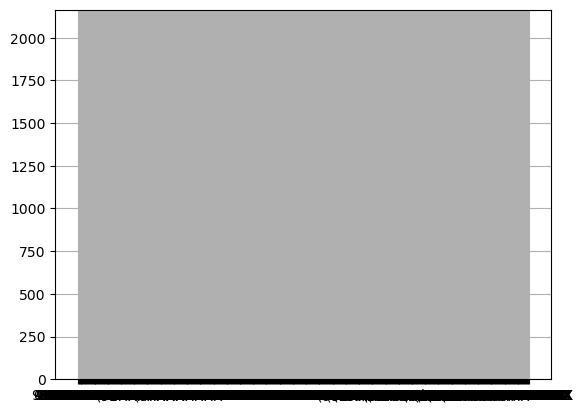

In [26]:
data.Mobile.hist()

In [27]:
data.loc[data['Mobile'].isnull(),'Mobile']="median"

In [28]:
data.isnull().sum()

Created           0
Product_ID        0
Source            0
Mobile            0
EMAIL             0
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [29]:
# sales_Agent

<Axes: >

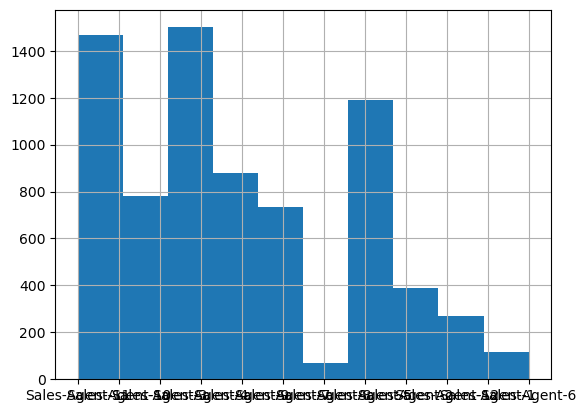

In [30]:
data.Sales_Agent.hist()

In [31]:
data.loc[data['Sales_Agent'].isnull(),'Sales_Agent']="median"

In [32]:
data.isnull().sum()

Created           0
Product_ID        0
Source            0
Mobile            0
EMAIL             0
Sales_Agent       0
Location         58
Delivery_Mode     0
Status            0
dtype: int64

In [33]:
## Location

<Axes: >

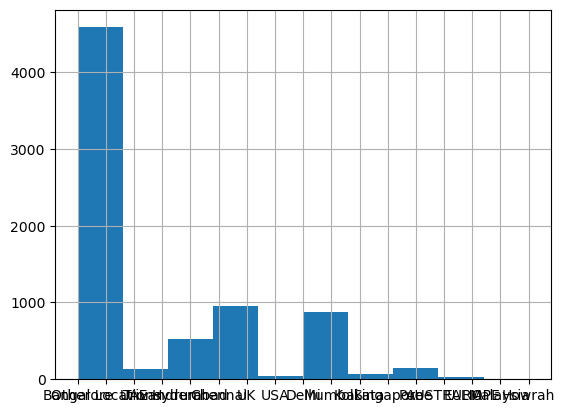

In [34]:
data.Location.hist()

In [35]:
data.loc[data['Location'].isnull(),'Location']="mean"

In [36]:
data.Location.isnull().sum()

0

In [37]:
# Null values are handled 

In [38]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

## Checking the numerical columns and categorical columns in a dataset

In [39]:
numerical_columns=data.select_dtypes(include=['number']).columns
print(numerical_columns)

Index([], dtype='object')


In [40]:
categorical_columns=data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')


## Step 3: Data Exploration

Purpose: Understand the structure, quality, and patterns in the data.
#Inspect the Dataset:
Check for columns, data types, missing values, and basic statistics (e.g., mean, median, standard deviation).

#Visualize Data:
Use histograms, box plots, and scatter plots to analyze relationships between features and lead categories.
Example:
How "Time Spent on Website" impacts lead potential.
Differences in "Pages Visited" for high and low potential leads.

In [41]:
## EXPLORATORY DATA ANALYSIS

In [42]:
from ydata_profiling import ProfileReport

In [43]:
Profile=ProfileReport(data,title="EDA",explorative=True)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
# Univariate Analysis

<Axes: xlabel='Source', ylabel='Count'>

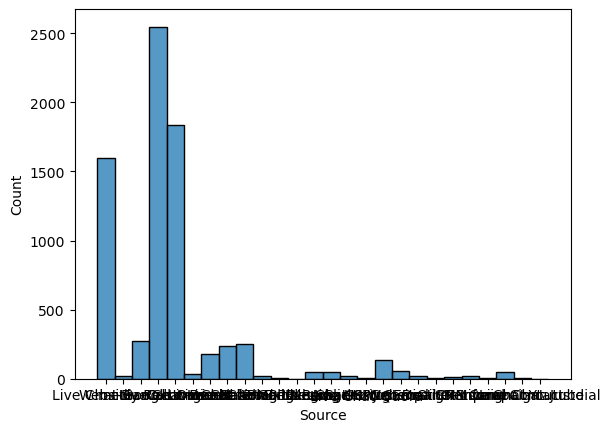

In [41]:
sns.histplot(x=data.Source,data=data)

<Axes: xlabel='Mobile', ylabel='Count'>

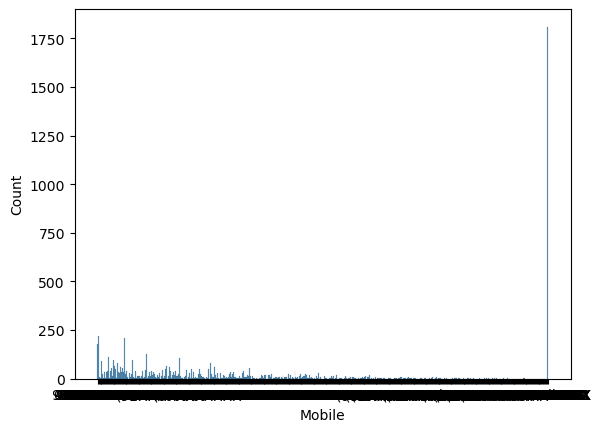

In [46]:
sns.histplot(x=data.Mobile,data=data)

<Axes: xlabel='EMAIL', ylabel='Count'>

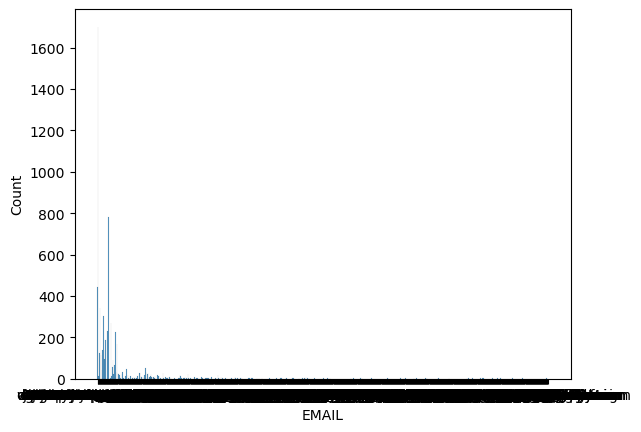

In [172]:
sns.histplot(x=data.EMAIL,data=data)

<Axes: xlabel='Sales_Agent', ylabel='Count'>

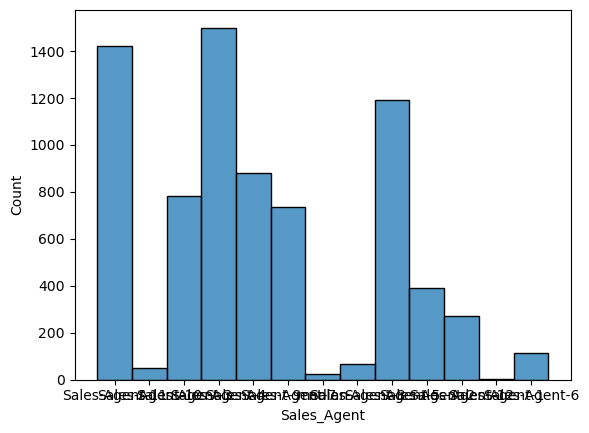

In [174]:
sns.histplot(x=data.Sales_Agent,data=data)

<Axes: xlabel='Location', ylabel='Count'>

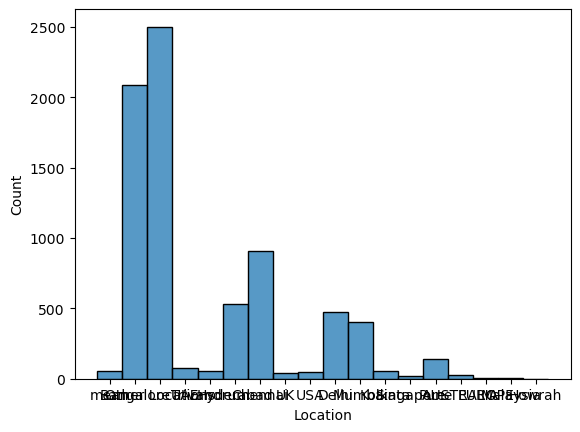

In [176]:
sns.histplot(x=data.Location,data=data)

In [252]:
# Bivariate Analysis

<Axes: xlabel='Source', ylabel='Mobile'>

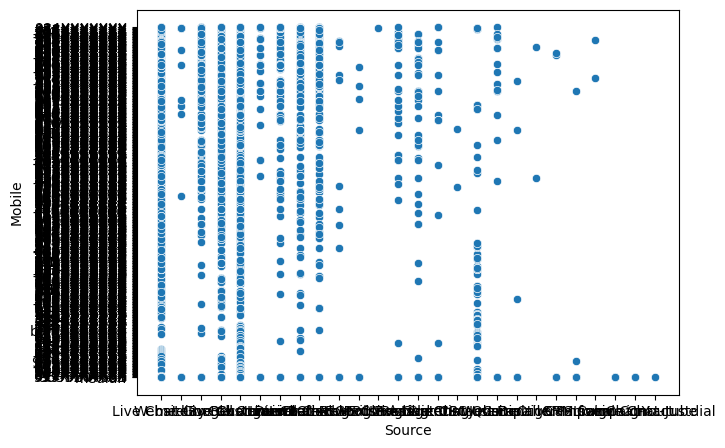

In [47]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data,x="Source",y="Mobile")

<Axes: xlabel='EMAIL', ylabel='Sales_Agent'>

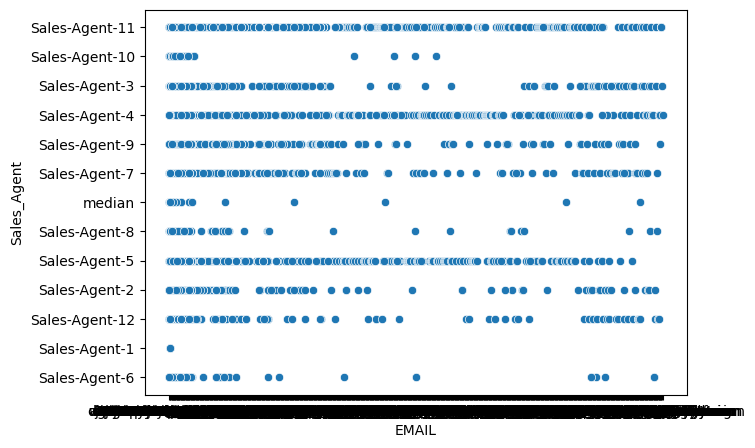

In [255]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data,x="EMAIL",y="Sales_Agent")

<Axes: xlabel='Location', ylabel='Delivery_Mode'>

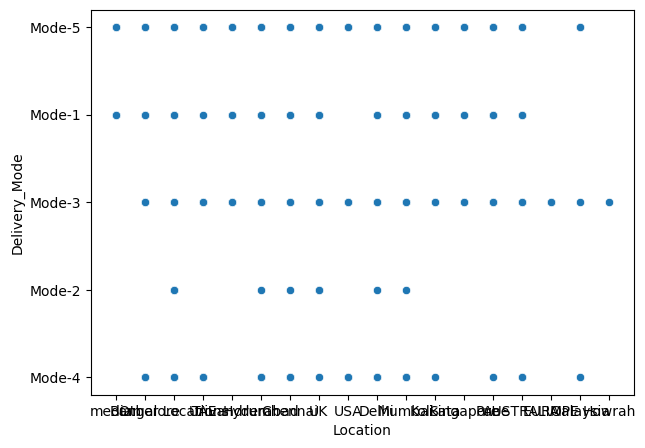

In [143]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data,x="Location",y="Delivery_Mode")

<Axes: xlabel='Mobile', ylabel='Status'>

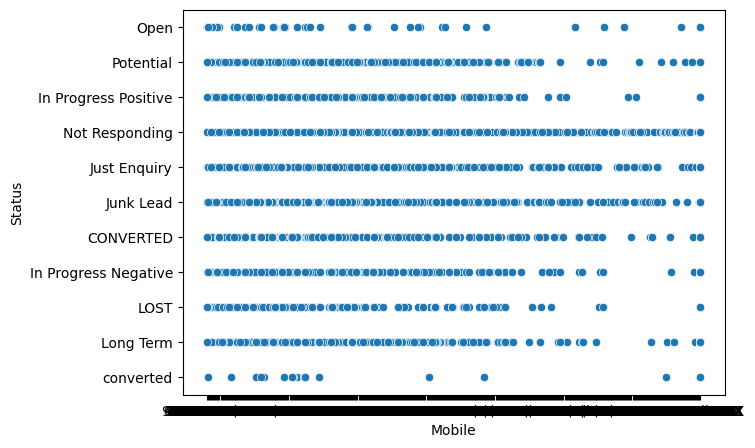

In [147]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data,x="Mobile",y="Status")

## Checking the Outliers

In [49]:
##Checking the OUTLIERS for numerical columns

In [45]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
for column in numerical_columns:          # loop through the columns in the data, excluding the outcome colum
        ax=plt.subplot(10,9,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
        plotnumber += 1
plt.tight_layout()


<Figure size 2000x2500 with 0 Axes>

In [ ]:
#Checking the outliers for categorical columns

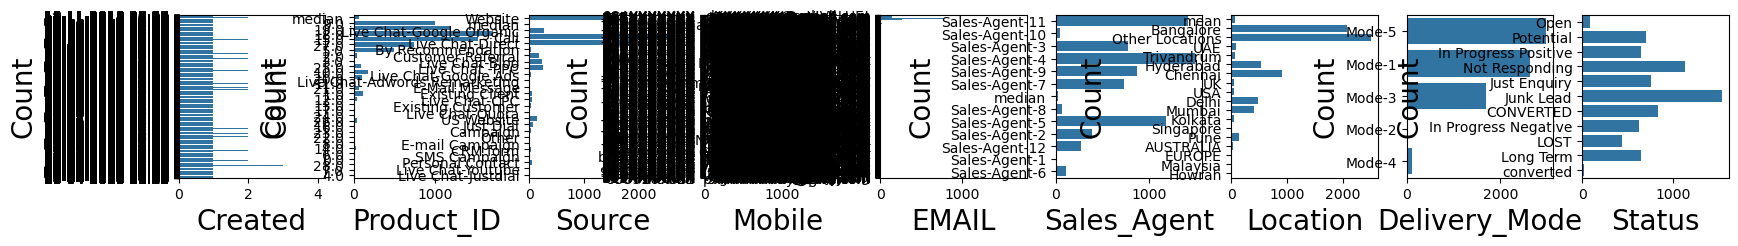

In [46]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
categorical_columns=data.select_dtypes(include=['object','category']).columns
for column in categorical_columns:          # loop through the columns in the data, excluding the outcome colum
        ax=plt.subplot(10,9,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
        plotnumber += 1
plt.tight_layout()

## Handling the Outliers by using Winsorize method

In [ ]:
#Handling the outliers for numerical columns

In [47]:
from scipy.stats import mstats
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply Winsorization to each numerical column
for col in numerical_columns:
    data[col] = mstats.winsorize(data[col], limits=[0.1, 0.1]) 

In [48]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
numerical_columns=data.select_dtypes(include=['int64','float64']).columns
for column in numerical_columns:          # loop through the columns in the data, excluding the outcome colum
        ax=plt.subplot(10,9,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
        plotnumber += 1
plt.tight_layout()

<Figure size 2000x2500 with 0 Axes>

In [ ]:
#Handling the outliers for categorical column

In [49]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Function to handle categorical outliers
def handle_categorical_outliers(data, categorical_columns, threshold=0.05, replace_with='Other', remove=False):
    """
    Handle categorical outliers by either replacing with 'Other' or removing.
    
    Parameters:
    - df: The DataFrame containing the data.
    - categorical_columns: The categorical columns to check for outliers.
    - threshold: The frequency threshold to identify rare categories (default is 5%).
    - replace_with: The category to replace rare categories with (default is 'Other').
    - remove: If True, remove rows with rare categories. If False, replace them with 'replace_with' (default).
    
    Returns:
    - df: The DataFrame with handled categorical outliers.
    """
    
    for col in categorical_columns:
        # Calculate the relative frequency of each category
        category_counts = data[col].value_counts(normalize=True)
        
        # Identify rare categories (below the threshold)
        rare_categories = category_counts[category_counts < threshold].index
        
        if len(rare_categories) > 0:
            if remove:
                # Remove rows with rare categories
                data= data[~data[col].isin(rare_categories)]
            else:
                # Replace rare categories with 'Other'
                data[col] = data[col].replace(rare_categories, replace_with)
    
    return data

# Handle categorical outliers
data_handled = handle_categorical_outliers(data, categorical_columns, threshold=0.05, replace_with='Other', remove=False)

In [ ]:
#Check whether the outliers are handled or not

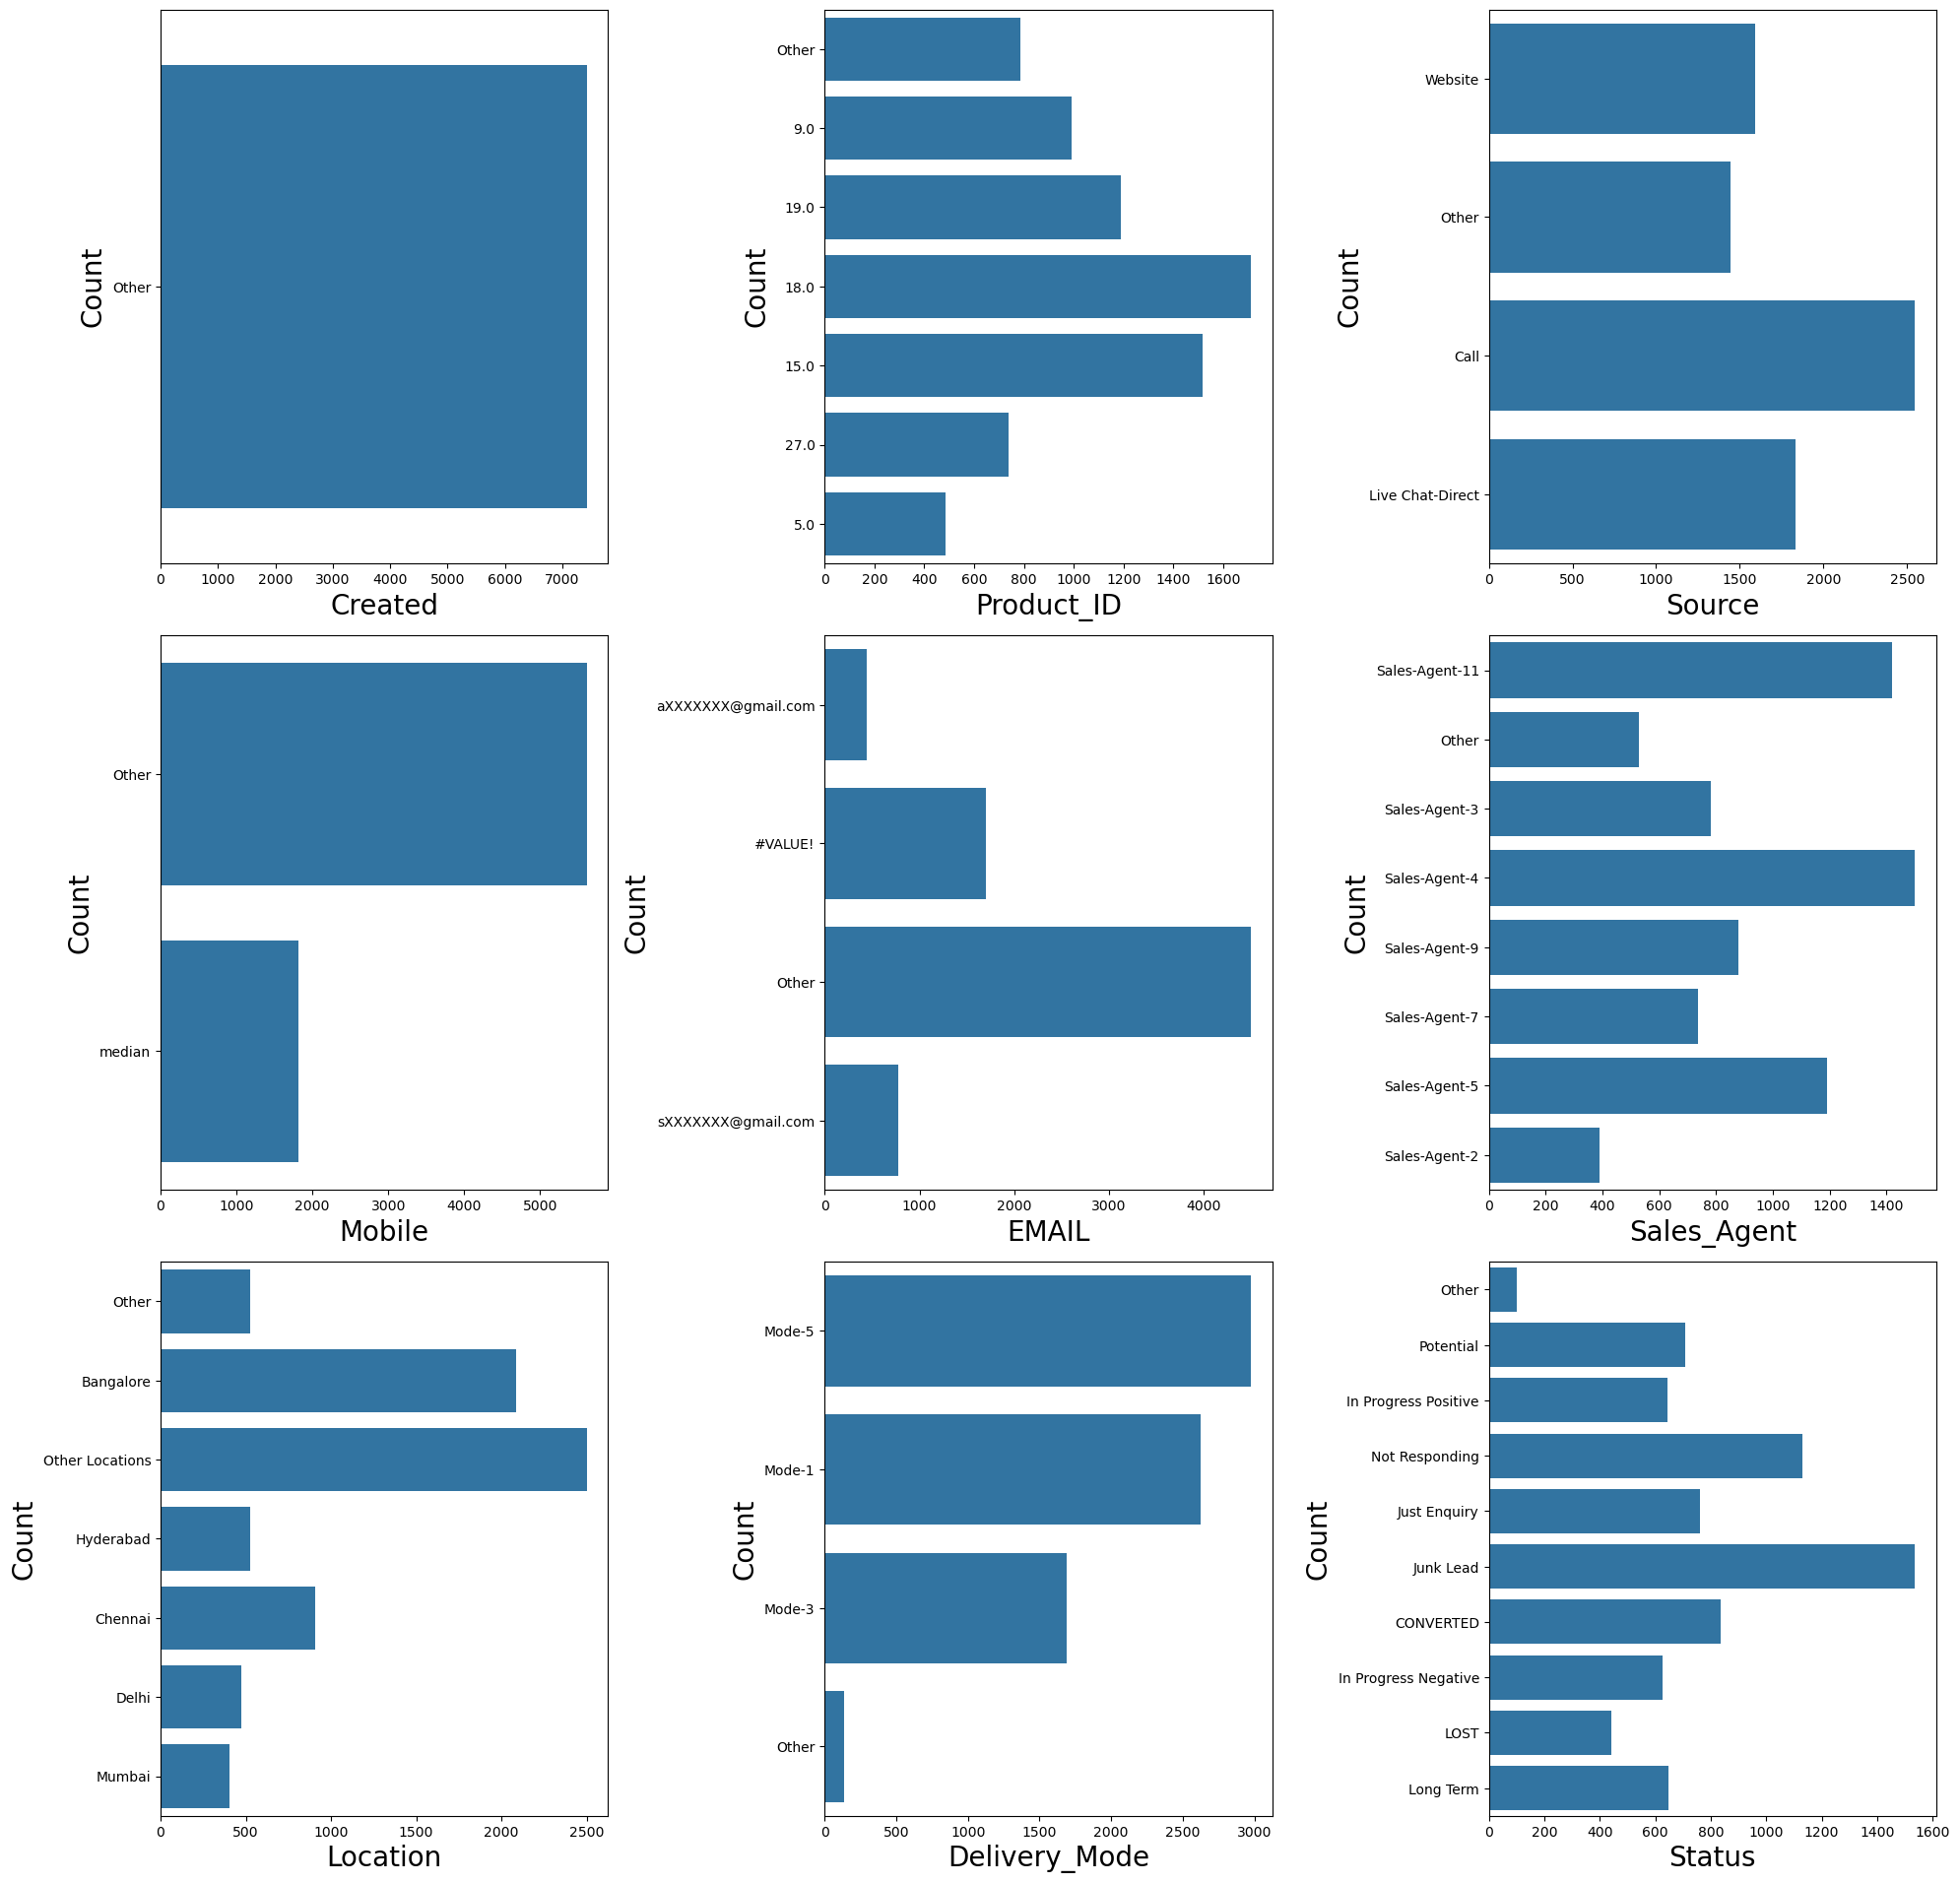

In [50]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
categorical_columns=data.select_dtypes(include=['object','category']).columns
for column in categorical_columns:          # loop through the columns in the data, excluding the outcome colum
        ax=plt.subplot(4,3,plotnumber)
        sns.countplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
        plotnumber += 1
plt.tight_layout()

In [51]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data_without_categorical = data.drop(columns=categorical_columns)

print(f"Original dataset shape: {data.shape}")
print(f"Dataset shape after removing categorical columns: {data_without_categorical.shape}")

Original dataset shape: (7422, 9)
Dataset shape after removing categorical columns: (7422, 0)


## applying Encoding techniques

In [52]:
# For One-Hot Encoding all categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)

# For Label Encoding all categorical columns (for ordinal ones)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column (that is not one-hot encoded)
data_encoded = data_encoded.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [54]:
categorical_columns=data.select_dtypes(include=["object"]).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col]=label_encoder.fit_transform(data[col].astype(str))

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Created        7422 non-null   int32
 1   Product_ID     7422 non-null   int32
 2   Source         7422 non-null   int32
 3   Mobile         7422 non-null   int32
 4   EMAIL          7422 non-null   int32
 5   Sales_Agent    7422 non-null   int32
 6   Location       7422 non-null   int32
 7   Delivery_Mode  7422 non-null   int32
 8   Status         7422 non-null   int32
dtypes: int32(9)
memory usage: 261.1 KB


In [56]:
# After applying the encoding techniques,check whether the data is encoded or not

In [57]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,6,3,0,2,1,5,2,8
1,0,6,3,0,0,0,5,2,8
2,0,6,3,0,1,0,5,2,8
3,0,6,3,0,1,0,5,2,8
4,0,6,3,0,1,0,5,2,8
...,...,...,...,...,...,...,...,...,...
7417,0,5,0,1,2,0,4,3,5
7418,0,0,0,1,0,0,6,2,5
7419,0,4,1,1,3,1,0,0,7
7420,0,6,2,1,1,4,6,0,4


## Split the data into X and Y

In [58]:
#step1  Independent and dependent variable creation
x=data.drop("Status",axis=1)    # x variable contain all i/p
y=data.Status

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [60]:
x_train.shape

(5195, 8)

In [61]:
x_test.shape

(2227, 8)

In [62]:
y_train.shape

(5195,)

In [63]:
y_test.shape

(2227,)

In [64]:
x_train

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode
5311,0,2,1,0,1,6,0,0
6746,0,0,0,1,0,6,6,2
6352,0,4,3,1,1,2,0,0
791,0,6,3,0,1,1,6,2
4719,0,6,3,0,1,6,0,0
...,...,...,...,...,...,...,...,...
6017,0,6,2,1,1,7,0,0
709,0,5,2,0,1,3,6,3
2487,0,6,3,0,1,0,5,2
174,0,0,0,0,0,6,6,2


In [65]:
x_test

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode
655,0,0,0,0,0,3,6,2
2853,0,0,1,0,2,1,5,2
4895,0,1,0,0,1,4,0,1
4965,0,1,3,0,3,1,3,2
3232,0,0,0,0,0,1,6,2
...,...,...,...,...,...,...,...,...
6147,0,5,0,1,1,3,4,0
7134,0,6,0,1,0,7,2,0
7135,0,3,0,1,2,5,0,0
2375,0,1,1,0,1,1,4,2


In [66]:
y_train

5311    0
6746    5
6352    1
791     9
4719    3
       ..
6017    6
709     9
2487    8
174     3
1146    4
Name: Status, Length: 5195, dtype: int32

In [67]:
y_test

655     7
2853    3
4895    4
4965    6
3232    3
       ..
6147    3
7134    7
7135    6
2375    9
5587    1
Name: Status, Length: 2227, dtype: int32

In [68]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [69]:
y_pred = model.predict(x_test)
y_pred

array([3, 4, 9, ..., 6, 3, 6])

## Model Building

In [70]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Calculate the RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print(f"RMSE: {rmse}")

RMSE: 3.590387806089205


In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Outputs
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.29321957790749886
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.35      0.34       255
           1       0.17      0.16      0.16       174
           2       0.31      0.41      0.36       186
           3       0.37      0.48      0.41       452
           4       0.20      0.18      0.19       232
           5       0.24      0.19      0.21       122
           6       0.25      0.22      0.23       184
           7       0.28      0.24      0.26       375
           8       0.62      0.59      0.60        27
           9       0.23      0.16      0.19       220

    accuracy                           0.29      2227
   macro avg       0.30      0.30      0.30      2227
weighted avg       0.28      0.29      0.28      2227

